# Mandatory Coin-flip Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Every statistics text must contain a coin-flipping example. We'll do that now to get it out of the way. Suppose, naively, that you are unsure about the probability of heads in a coin flip. You believe there is some true underlying ratio, call it $p$, but have no prior opinion on what $p$ might be.

We start by randomly picking a bias for our coin $p \in [0.25, 0.75]$, you know, to keep things interesting. This is only used in the next step: data generation.

In [2]:
p = 0.5 * np.random.rand() + 0.25
p

0.46323508372698263

We begin to flip a coin $100$ times, and record the observations: either $H$ or $T$. This is our observed data.

In [3]:
data = stats.bernoulli.rvs(p, size=100)

An interesting question to ask is how our inference changes as we observe more and more data? More specifically, what do our posterior probabilities look like when we have little data, versus when we have lots of data. To do this, we need to pick a prior distribution. Since the bias of the coin ranges from $[0,1]$, and we know something about the expected value of Beta distributions, we go with that.

We now loop through our observations and ask, up to this point, how many heads and tails have we seen? This information is used to construct our posterior distribution. The posterior is then plotted after each new observation. I didn't really want to bother with matplotlib, so I just plot each posterior on the same plot — I'm lazy.

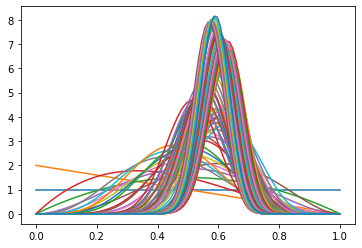

In [4]:
x = np.linspace(0, 1, 100)
for N in range(len(data) + 1):
    heads = data[0:N].sum()
    tails = N - heads

    posterior = stats.beta.pdf(x, 1 + heads, 1 + tails)

    plt.plot(x, posterior)